In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("application_record.csv")

In [3]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
if 'CODE_GENDER' in df.columns:
    df = pd.get_dummies(df, columns=['CODE_GENDER'], prefix='CODE_GENDER')
else:
    print("La columna 'CODE_GENDER' no está en el DataFrame.")

# cambiamos el tipo de dato de CNT_FAM_MEMBERS y AMT_INCOME_TOTAL a int
df = df.astype({'CNT_FAM_MEMBERS': 'int', 'AMT_INCOME_TOTAL': 'int'})

In [6]:
df.dtypes

ID                      int64
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN            int64
AMT_INCOME_TOTAL        int64
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
DAYS_BIRTH              int64
DAYS_EMPLOYED           int64
FLAG_MOBIL              int64
FLAG_WORK_PHONE         int64
FLAG_PHONE              int64
FLAG_EMAIL              int64
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS         int64
CODE_GENDER_F            bool
CODE_GENDER_M            bool
dtype: object

In [7]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M
0,5008804,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,False,True
1,5008805,Y,Y,0,427500,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,False,True
2,5008806,Y,Y,0,112500,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,False,True
3,5008808,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False
4,5008809,N,Y,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,True,False


In [8]:
df.isnull().sum()

ID                          0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
CODE_GENDER_F               0
CODE_GENDER_M               0
dtype: int64

In [9]:
df = df.dropna(how='any', axis=0)
df.isnull().sum()

ID                     0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
CODE_GENDER_F          0
CODE_GENDER_M          0
dtype: int64

In [10]:
print(df['OCCUPATION_TYPE'].value_counts())

OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


In [11]:
occupation_mapping = {
    'Laborers': 1,
    'Core staff': 2,
    'Sales staff': 3,
    'Managers': 4,
    'Drivers': 5,
    'High skill tech staff': 6,
    'Accountants': 7,
    'Medicine staff': 8,
    'Cooking staff': 9,
    'Security staff': 10,
    'Cleaning staff': 11,
    'Private service staff': 12,
    'Low-skill Laborers': 13,
    'Secretaries': 14,
    'Waiters/barmen staff': 15,
    'Realty agents': 16,
    'HR staff': 17,
    'IT staff': 18
}

# Crear la columna numérica
df['OCCUPATION_TYPE_INT'] = df['OCCUPATION_TYPE'].map(occupation_mapping)

df = df.drop(columns=['NAME_INCOME_TYPE', 'OCCUPATION_TYPE'])


In [12]:
print(df['NAME_EDUCATION_TYPE'].value_counts())

NAME_EDUCATION_TYPE
Secondary / secondary special    204792
Higher education                  85663
Incomplete higher                 11635
Lower secondary                    2039
Academic degree                     225
Name: count, dtype: int64


In [13]:
education_mapping = {
    'Secondary / secondary special': 1,
    'Higher education': 2,
    'Incomplete higher': 3,
    'Lower secondary': 4,
    'Academic degree': 5

}

# Realizamos un mapeo de la columna educacion para poder tener los datos en valores enteros
df['NAME_EDUCATION_TYPE_INT'] = df['NAME_EDUCATION_TYPE'].map(education_mapping)

# borramos la columna, porque ya no sera relevante
df = df.drop(columns=['NAME_EDUCATION_TYPE'])


In [14]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT
2,5008806,Y,Y,0,112500,Married,House / apartment,-21474,-1134,1,0,0,0,2,False,True,10,1
3,5008808,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1
4,5008809,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1
5,5008810,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1
6,5008811,N,Y,0,270000,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1


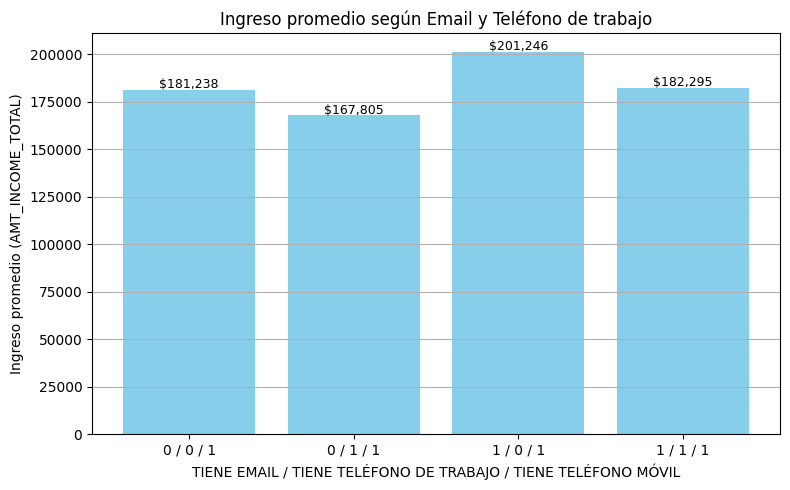

In [15]:
# Filtrar solo "Commercial associate" si lo deseas
subset = df[df.OCCUPATION_TYPE_INT == 1]

# Agrupar por FLAG_EMAIL y FLAG_WORK_PHONE y calcular ingreso promedio y conteo
income_stats = subset.groupby(['FLAG_EMAIL', 'FLAG_WORK_PHONE', 'FLAG_MOBIL'])['AMT_INCOME_TOTAL'].agg(['mean', 'count']).reset_index()

# Crear una columna combinada para graficar
income_stats['combo'] = income_stats['FLAG_EMAIL'].astype(str) + ' / ' + income_stats['FLAG_WORK_PHONE'].astype(str) + ' / ' + income_stats['FLAG_MOBIL'].astype(str)

# Graficar ingreso promedio por combinación
plt.figure(figsize=(8, 5))
plt.bar(income_stats['combo'], income_stats['mean'], color='skyblue')

# Opcional: mostrar cantidad sobre cada barra
for i, val in enumerate(income_stats['mean']):
    plt.text(i, val + 1000, f"${val:,.0f}", ha='center', fontsize=9)

plt.title('Ingreso promedio según Email y Teléfono de trabajo')
plt.xlabel('TIENE EMAIL / TIENE TELÉFONO DE TRABAJO / TIENE TELÉFONO MÓVIL')
plt.ylabel('Ingreso promedio (AMT_INCOME_TOTAL)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Utilizamos la ocupacion laboradores para poder verificar, que personas tienen correo, telefono personal yy de trabajo para poder contactar con ellos

<Axes: >

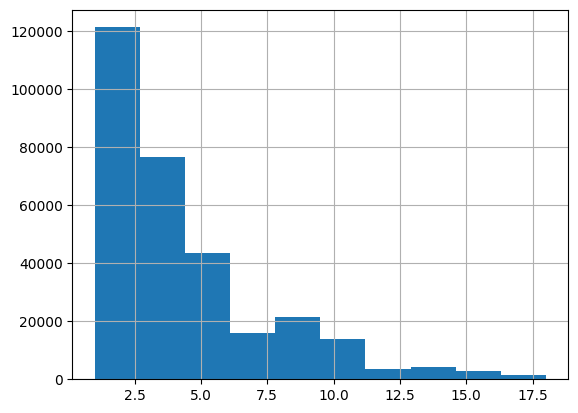

In [16]:
df['OCCUPATION_TYPE_INT'].hist()

In [17]:
print(df['NAME_FAMILY_STATUS'].value_counts())

NAME_FAMILY_STATUS
Married                 212721
Single / not married     39649
Civil marriage           26802
Separated                18470
Widow                     6712
Name: count, dtype: int64


In [18]:
family_status_mapping = {
    'Married': 1,
    'Single / not married': 2,
    'Civil marriage': 3,
    'Widow': 4,
    'Separated': 5
}
# Realizamos un mapeo de la columna educacion para poder tener los datos en valores enteros
df['NAME_FAMILY_STATUS_INT'] = df['NAME_FAMILY_STATUS'].map(family_status_mapping)
# borramos la columna, porque ya no sera relevante
df = df.drop(columns=['NAME_FAMILY_STATUS'])
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT
2,5008806,Y,Y,0,112500,House / apartment,-21474,-1134,1,0,0,0,2,False,True,10,1,1
3,5008808,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2
4,5008809,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2
5,5008810,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2
6,5008811,N,Y,0,270000,House / apartment,-19110,-3051,1,0,1,1,1,True,False,3,1,2


In [19]:
print(df['NAME_HOUSING_TYPE'].value_counts())

NAME_HOUSING_TYPE
House / apartment      270017
With parents            15641
Municipal apartment      9663
Rented apartment         4819
Office apartment         3006
Co-op apartment          1208
Name: count, dtype: int64


In [20]:
housing_mapping = {
    'House / apartment': 1,
    'With parents': 2,
    'Municipal apartment': 3,
    'Rented apartment': 4,
    'Office apartment': 5,
    'Co-op apartment': 6
}
# Realizamos un mapeo de la columna educacion para poder tener los datos en valores enteros
df['NAME_HOUSING_TYPE_INT'] = df['NAME_HOUSING_TYPE'].map(housing_mapping)
# borramos la columna, porque ya no sera relevante
df = df.drop(columns=['NAME_HOUSING_TYPE'])
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT
2,5008806,Y,Y,0,112500,-21474,-1134,1,0,0,0,2,False,True,10,1,1,1
3,5008808,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1
4,5008809,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1
5,5008810,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1
6,5008811,N,Y,0,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1


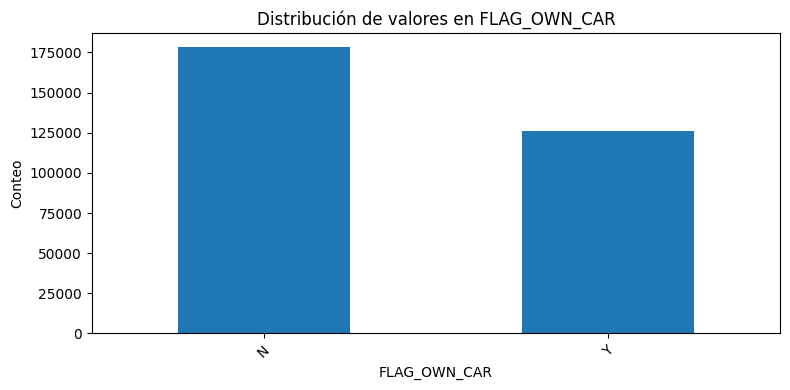

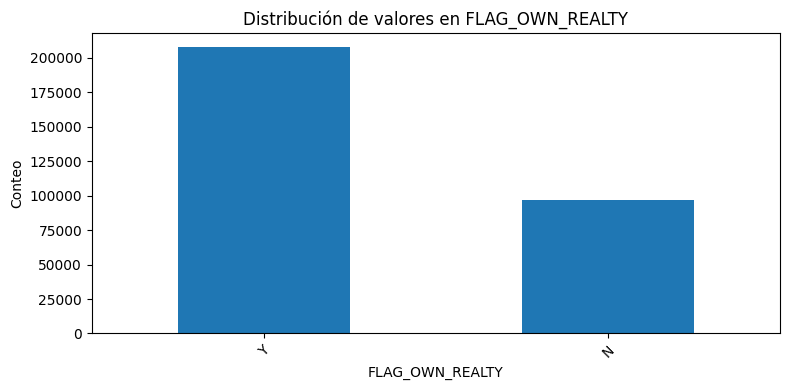

In [21]:
object_cols = df.select_dtypes(include=['object']).columns

# Recorrer cada columna de tipo object
for col in object_cols:
    plt.figure(figsize=(8, 4))  # Opcional: tamaño del gráfico
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45)  # Opcional: rotar etiquetas si son largas
    plt.tight_layout()
    plt.show()

con esto verificamos si dispone de coche y bienes inmobiliarios, que puede servir a la hora de dar el credito

In [22]:
df["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0     192856
1      73130
2      33512
3       4311
4        401
5        122
7          9
9          5
12         4
14         3
19         1
Name: count, dtype: int64

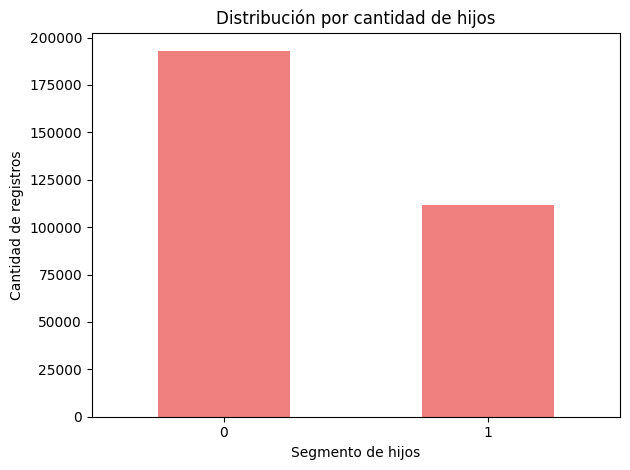

In [23]:
df = df[df['CNT_CHILDREN'].notnull()]

# Dividir la columna 'CNT_CHILDREN' en 2 segmentos: 'Tiene hijos' y 'No tiene hijos'
df['HAVE_CHILDREN'] = df['CNT_CHILDREN'].apply(lambda x: 0 if x == 0 else 1)

# Contar cuántos registros hay en cada grupo
segmentos = df['HAVE_CHILDREN'].value_counts().sort_index()

#elimina la columna hijos, y deja dos columnas simplificadas
df = df.drop(columns=['CNT_CHILDREN'])


# Graficar
segmentos.plot(kind='bar', color='lightcoral')
plt.title('Distribución por cantidad de hijos')
plt.xlabel('Segmento de hijos')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [24]:
df.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT,HAVE_CHILDREN
2,5008806,Y,Y,112500,-21474,-1134,1,0,0,0,2,False,True,10,1,1,1,0
3,5008808,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,0
4,5008809,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,0
5,5008810,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,0
6,5008811,N,Y,270000,-19110,-3051,1,0,1,1,1,True,False,3,1,2,1,0


In [25]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].abs() # Convertir los valores negativos a positivos

# Mostrar el resultado
print(df['DAYS_BIRTH'].head())

2    21474
3    19110
4    19110
5    19110
6    19110
Name: DAYS_BIRTH, dtype: int64


In [26]:
# Usando 365.2425 días por año (más preciso)
df['AGE_YEARS'] = round(df['DAYS_BIRTH'].abs() / 365.2425, 1)
# Usando 365.2425 días por año (más preciso)
df['AGE_EMPLOYED'] = round(df['DAYS_EMPLOYED'].abs() / 365.2425, 1)

df = df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'])

In [27]:
print(df.columns)

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'OCCUPATION_TYPE_INT', 'NAME_EDUCATION_TYPE_INT',
       'NAME_FAMILY_STATUS_INT', 'NAME_HOUSING_TYPE_INT', 'HAVE_CHILDREN',
       'AGE_YEARS', 'AGE_EMPLOYED'],
      dtype='object')


In [28]:
df.dtypes

ID                           int64
FLAG_OWN_CAR                object
FLAG_OWN_REALTY             object
AMT_INCOME_TOTAL             int64
FLAG_MOBIL                   int64
FLAG_WORK_PHONE              int64
FLAG_PHONE                   int64
FLAG_EMAIL                   int64
CNT_FAM_MEMBERS              int64
CODE_GENDER_F                 bool
CODE_GENDER_M                 bool
OCCUPATION_TYPE_INT          int64
NAME_EDUCATION_TYPE_INT      int64
NAME_FAMILY_STATUS_INT       int64
NAME_HOUSING_TYPE_INT        int64
HAVE_CHILDREN                int64
AGE_YEARS                  float64
AGE_EMPLOYED               float64
dtype: object

Ahora realizaremos la escala para poder obtener la caja negra, y poder manejar los datos mejor 

In [29]:
map_flags = {
    'Y': 1, 'YES': 1, '1': 1,
    'N': 0, 'NO': 0, '0': 0
}

#columnas a convertir a tipo binario'
cols_convert = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

for col in cols_convert:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.upper()
        .map(map_flags)
        .fillna(0)
        .astype(int)
    )

df['CODE_GENDER_F'] = df['CODE_GENDER_F'].astype(int)
df['CODE_GENDER_M'] = df['CODE_GENDER_M'].astype(int)

<Axes: >

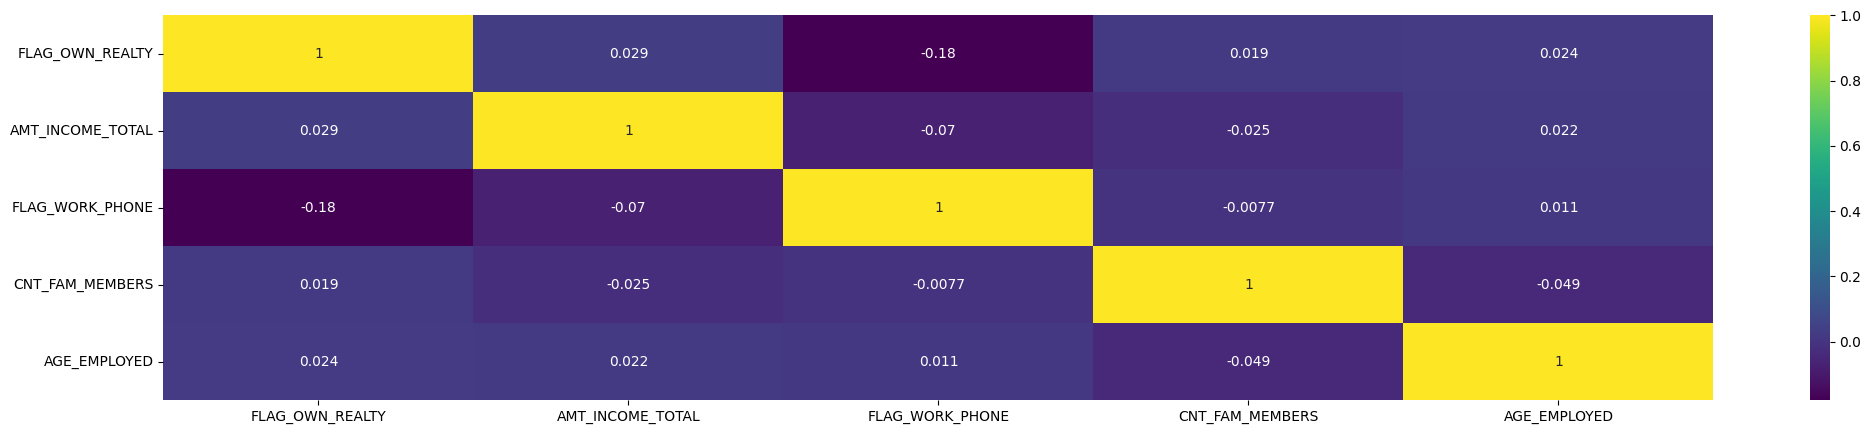

In [30]:
# Primero elimina columnas del DataFrame original
columnas_a_eliminar = [
    'ID', 'FLAG_OWN_CAR', 'HAVE_CHILDREN', 'NAME_FAMILY_STATUS_INT', 'CODE_GENDER_F', 'CODE_GENDER_M',
    'DAYS_BIRTH', 'FLAG_PHONE', 'AGE_YEARS', 'OCCUPATION_TYPE_INT', 'NAME_HOUSING_TYPE_INT', 'NAME_EDUCATION_TYPE_INT', 'FLAG_MOBIL', 'FLAG_EMAIL'
]

df_filtrado = df.drop(columns=columnas_a_eliminar, errors='ignore')  # 'ignore' evita error si faltan columnas
df_filtrado = df_filtrado.select_dtypes(include=['int64', 'float64'])  # ahora sí, solo numéricas

# Graficar matriz de correlación
plt.figure(figsize=(25, 5))
sns.heatmap(df_filtrado.corr(), annot=True, cmap="viridis")

In [31]:
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT,HAVE_CHILDREN,AGE_YEARS,AGE_EMPLOYED
2,5008806,1,1,112500,1,0,0,0,2,0,1,10,1,1,1,0,58.8,3.1
3,5008808,0,1,270000,1,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
4,5008809,0,1,270000,1,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
5,5008810,0,1,270000,1,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
6,5008811,0,1,270000,1,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,0,1,202500,1,1,0,0,2,0,1,1,2,3,1,0,37.0,6.3
438548,6839936,1,1,135000,1,0,0,0,3,0,1,1,1,1,1,1,34.4,5.7
438553,6840222,0,0,103500,1,0,0,0,1,1,0,1,1,2,1,0,43.6,8.2
438554,6841878,0,0,54000,1,1,0,0,1,1,0,3,2,2,2,0,22.4,1.0


In [32]:
df['FLAG_MOBIL'].value_counts()
# esta la descartamos del heatmap porque todos tienen movil, entonces no aporta nada
df = df.drop(columns=['FLAG_MOBIL'])
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT,HAVE_CHILDREN,AGE_YEARS,AGE_EMPLOYED
2,5008806,1,1,112500,0,0,0,2,0,1,10,1,1,1,0,58.8,3.1
3,5008808,0,1,270000,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
4,5008809,0,1,270000,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
5,5008810,0,1,270000,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
6,5008811,0,1,270000,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,0,1,202500,1,0,0,2,0,1,1,2,3,1,0,37.0,6.3
438548,6839936,1,1,135000,0,0,0,3,0,1,1,1,1,1,1,34.4,5.7
438553,6840222,0,0,103500,0,0,0,1,1,0,1,1,2,1,0,43.6,8.2
438554,6841878,0,0,54000,1,0,0,1,1,0,3,2,2,2,0,22.4,1.0


Ahora que tenemos todo listo, crearemos dos arboles para dar comparacion a los datos, un arbol sin AMT escalado, y el otro con AMT escalado, para ver los resultados

In [33]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
df['AMT_INCOME_TOTAL'] = escalador.fit_transform(df[['AMT_INCOME_TOTAL']])

In [34]:
df.to_csv("exportado_credito.csv", index=False)


In [35]:
# Criterios lógicos, con los que se va a filtrar el dataset
df['criterio_ingreso'] = df['AMT_INCOME_TOTAL'] > 0.60
df['criterio_edad'] = df['AGE_YEARS'].between(20, 60)
df['criterio_empleo'] = df['AGE_EMPLOYED'] > 3
df['criterio_educacion'] = df['NAME_EDUCATION_TYPE_INT'] <= 2
df['criterio_familia'] = df['CNT_FAM_MEMBERS'] <= 4
df['criterio_bienes'] = df['FLAG_OWN_REALTY'] == 1
df['criterio_civil'] = df['NAME_FAMILY_STATUS_INT'] != 5
df['criterio_telefono'] = df['FLAG_WORK_PHONE'] == 1

In [36]:
# Asignación de pesos (priorizados con más valor)
df['estado_credito'] = (
    df['criterio_ingreso'].astype(int) * 2 +  # peso 2
    df['criterio_bienes'].astype(int) * 2 +   # peso 2
    df['criterio_telefono'].astype(int) * 2 + # peso 2
    df['criterio_empleo'].astype(int) * 2 +   # peso 2
    df['criterio_edad'].astype(int) * 1 +
    df['criterio_educacion'].astype(int) * 1 +
    df['criterio_familia'].astype(int) * 1 +
    df['criterio_civil'].astype(int) * 1
)

# Nuevo umbral (ajustado al nuevo máximo posible de puntaje)
df['estado_credito'] = df['estado_credito'].apply(lambda x: 1 if x >= 8 else 0)

In [37]:
X=df[['FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE_INT']]
Y=df["estado_credito"]

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=8, random_state=42)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 76.38%


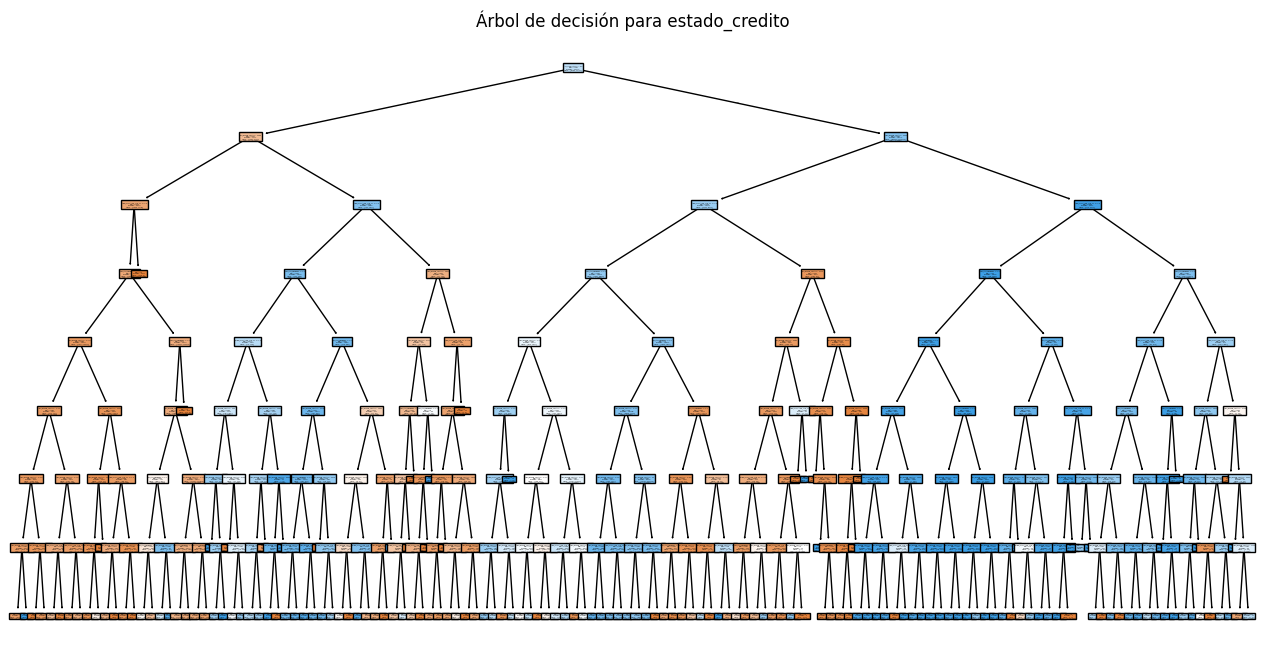

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(modelo, feature_names=X.columns, class_names=["No Aprobado", "Aprobado"], filled=True)
plt.title("Árbol de decisión para estado_credito")
plt.show()

In [42]:
x_train.shape, x_test.shape

((243483, 4), (60871, 4))

In [43]:
escala = StandardScaler()
x_train = escala.fit_transform(x_train)
x_test = escala.transform(x_test)

In [44]:
import sklearn


RGL = sklearn.linear_model.LogisticRegression(class_weight = 'balanced')
RGL.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [45]:
from sklearn.metrics import confusion_matrix
y_pred = RGL.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[14982,  9776],
       [ 7885, 28228]])

Text(95.72222222222221, 0.5, 'Real')

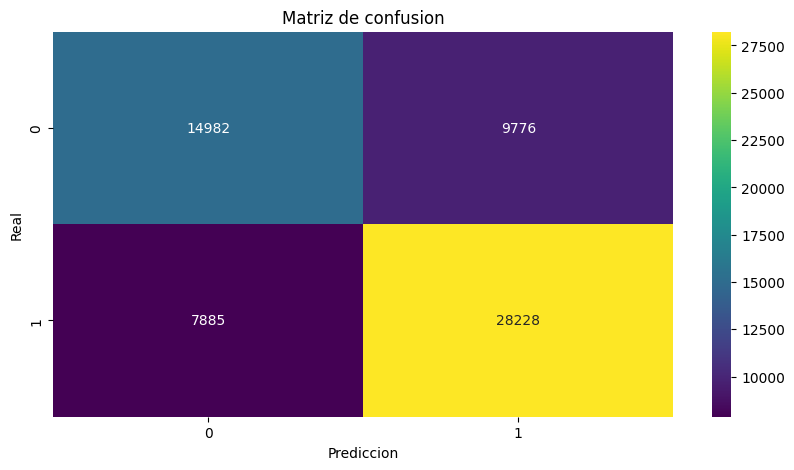

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap="viridis", fmt="d")
plt.title("Matriz de confusion")
plt.xlabel("Prediccion")
plt.ylabel("Real")

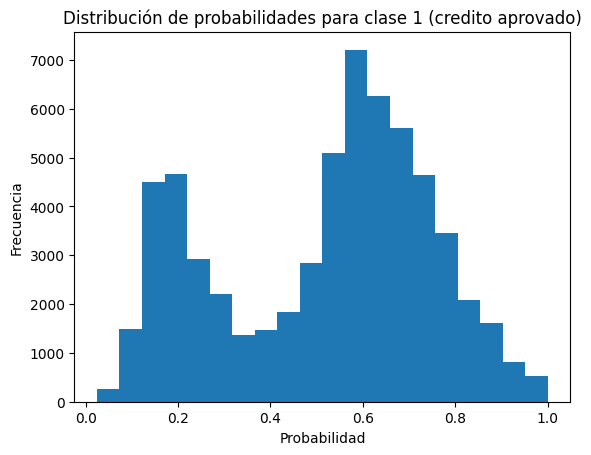

In [47]:
df['estado_credito'].value_counts(normalize=True)
y_proba = RGL.predict_proba(x_test)
y_proba
plt.hist(y_proba[:,1], bins=20)
plt.title("Distribución de probabilidades para clase 1 (credito aprovado)")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.show()

In [48]:
df['estado_credito'].value_counts()

estado_credito
1    181410
0    122944
Name: count, dtype: int64

In [49]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(RGL, method='sigmoid')  # o 'isotonic'
calibrated_model.fit(x_train, y_train)

CalibratedClassifierCV(estimator=LogisticRegression(class_weight='balanced'))

In [50]:
y_proba_calibrated = calibrated_model.predict_proba(x_test)
y_proba_calibrated

array([[0.69199953, 0.30800047],
       [0.24257894, 0.75742106],
       [0.73796987, 0.26203013],
       ...,
       [0.22040558, 0.77959442],
       [0.2864626 , 0.7135374 ],
       [0.0963883 , 0.9036117 ]], shape=(60871, 2))

In [51]:

y_proba_original = RGL.predict_proba(x_test)
y_proba_original

array([[0.76838284, 0.23161716],
       [0.32173902, 0.67826098],
       [0.80609098, 0.19390902],
       ...,
       [0.2951879 , 0.7048121 ],
       [0.37280869, 0.62719131],
       [0.13663697, 0.86336303]], shape=(60871, 2))

In [52]:
#  probabilidades de clase 1
y_proba_original = RGL.predict_proba(x_test)[:, 1]
y_proba_calibrated = calibrated_model.predict_proba(x_test)[:, 1]

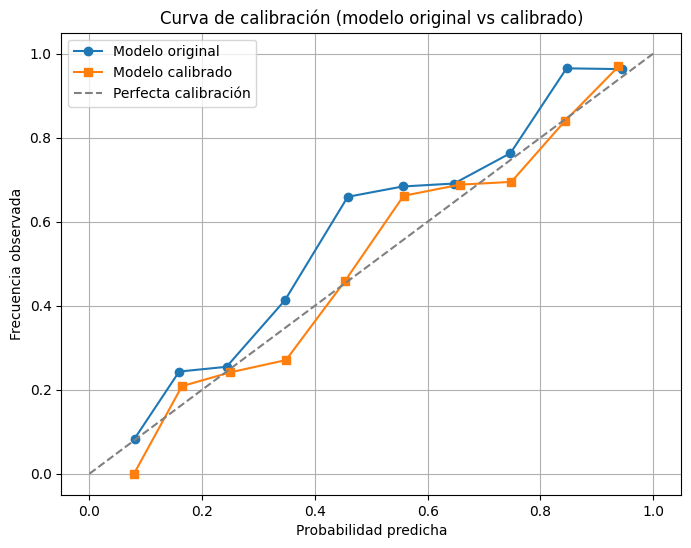

In [53]:
from sklearn.calibration import calibration_curve
# Curvas de calibración
prob_true_orig, prob_pred_orig = calibration_curve(y_test, y_proba_original, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_calibrated, n_bins=10)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_orig, prob_true_orig, marker='o', label='Modelo original')
plt.plot(prob_pred_cal, prob_true_cal, marker='s', label='Modelo calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfecta calibración')

plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia observada')
plt.title('Curva de calibración (modelo original vs calibrado)')
plt.legend()
plt.grid()

✅ Mejor umbral para F1-score: 0.45
📈 F1-score máximo: 0.7988


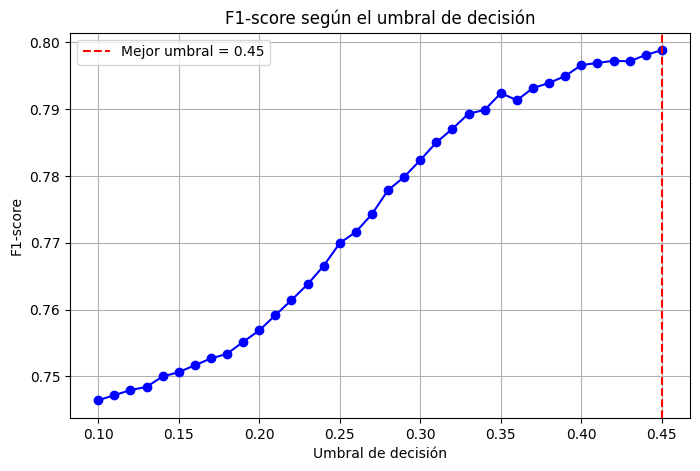

In [54]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Rango de umbrales a evaluar
umbrales = np.arange(0.1, 0.46, 0.01)
f1_scores = []

for umbral in umbrales:
    y_pred = (y_proba_calibrated >= umbral).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Mejor umbral
mejor_umbral = umbrales[np.argmax(f1_scores)]
mejor_f1 = max(f1_scores)

print(f"✅ Mejor umbral para F1-score: {mejor_umbral:.2f}")
print(f"📈 F1-score máximo: {mejor_f1:.4f}")

# Gráfico de F1-score vs umbral
plt.figure(figsize=(8, 5))
plt.plot(umbrales, f1_scores, marker='o', color='blue')
plt.axvline(mejor_umbral, color='red', linestyle='--', label=f'Mejor umbral = {mejor_umbral:.2f}')
plt.title('F1-score según el umbral de decisión')
plt.xlabel('Umbral de decisión')
plt.ylabel('F1-score')
plt.grid(True)
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_pred_037 = (y_proba_calibrated >= 0.37).astype(int)
precision = precision_score(y_test, y_pred_037)
recall = recall_score(y_test, y_pred_037)
f1 = f1_score(y_test, y_pred_037)
matriz = confusion_matrix(y_test, y_pred_037)

print(f"✅ Umbral aplicado: 0.37")
print(f"✔️ Precisión: {precision:.4f}")
print(f"✔️ Recall: {recall:.4f}")
print(f"✔️ F1-score: {f1:.4f}")
print("🧾 Matriz de Confusión:")
print(matriz)

# Reporte completo
print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_037))

✅ Umbral aplicado: 0.37
✔️ Precisión: 0.7067
✔️ Recall: 0.9037
✔️ F1-score: 0.7932
🧾 Matriz de Confusión:
[[11215 13543]
 [ 3477 32636]]

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.76      0.45      0.57     24758
           1       0.71      0.90      0.79     36113

    accuracy                           0.72     60871
   macro avg       0.74      0.68      0.68     60871
weighted avg       0.73      0.72      0.70     60871



In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

In [57]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Calcular las curvas
train_sizes, train_scores, val_scores = learning_curve(
    estimator=RGL,
    X=x_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 valores de tamaño
    cv=cv,
    scoring='accuracy',  # puedes cambiar a 'f1', 'roc_auc', etc.
    n_jobs=-1
)

In [58]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

In [59]:
train_scores_mean

array([0.71236267, 0.71315553, 0.7136408 , 0.71314013, 0.71336749,
       0.71332153, 0.71387019, 0.71342121, 0.7130782 , 0.71335004])

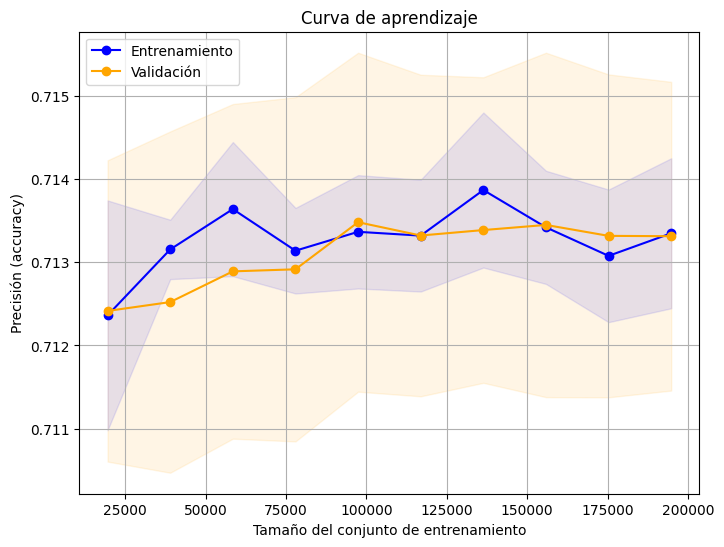

In [60]:
# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="blue")

plt.plot(train_sizes, val_scores_mean, 'o-', label="Validación", color="orange")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="orange")

plt.title("Curva de aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión (accuracy)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [61]:
from sklearn.metrics import precision_score

# Predicciones con umbral 0.5
y_pred_05 = (y_proba_calibrated >= 0.46).astype(int)

# Calcular precisión
precision = precision_score(y_test, y_pred_05)
print(f"🔍 Precisión con umbral 0.46: {precision:.4f}")

🔍 Precisión con umbral 0.46: 0.7310


In [62]:
print(df['estado_credito'].value_counts())

estado_credito
1    181410
0    122944
Name: count, dtype: int64
